In [84]:
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub
import numpy as np
import cv2
import joblib

In [85]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_path =("/content/drive/My Drive/datasets/dtsp/")

Mounted at /content/drive


In [86]:
IMAGE_SHAPE = (224, 224) # (height, width) in no. of pixels

In [87]:
TRAINING_DATA_DIR = str(data_path)
datagen_kwargs = dict(rescale=1./255, validation_split=.5)

In [88]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(TRAINING_DATA_DIR,subset="validation", shuffle=True,target_size=IMAGE_SHAPE)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(TRAINING_DATA_DIR,subset="training",shuffle=True,target_size=IMAGE_SHAPE)

Found 700 images belonging to 2 classes.
Found 700 images belonging to 2 classes.


In [89]:
print (train_generator.class_indices)
train_generator.image_shape
valid_generator.image_shape

{'original': 0, 'tampered': 1}


(224, 224, 3)

In [90]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [91]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))

# output layer
model.add(Dense(2, activation='softmax'))


In [92]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 25)      700       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 222, 222, 25)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1232100)           0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               123210100 
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 2)                

In [93]:
from keras.metrics import AUC,Precision,Recall
optimizer = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', 
              metrics=['acc',
                       AUC(name='auc'),
                       Recall(thresholds=0.5),
                       Precision(thresholds=0.5)])

In [102]:
# steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
# val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(train_generator, epochs=30,validation_data=valid_generator)

Epoch 1/30
22/22 [==============================] - 64s 3s/step - loss: 0.0477 - acc: 0.9900 - auc: 0.9961 - recall_1: 0.9900 - precision_1: 0.9900 - val_loss: 4.3576 - val_acc: 0.5371 - val_auc: 0.5170 - val_recall_1: 0.5371 - val_precision_1: 0.5371
Epoch 2/30
22/22 [==============================] - 54s 2s/step - loss: 0.0276 - acc: 0.9914 - auc: 0.9995 - recall_1: 0.9914 - precision_1: 0.9914 - val_loss: 3.7877 - val_acc: 0.5357 - val_auc: 0.4980 - val_recall_1: 0.5357 - val_precision_1: 0.5357
Epoch 3/30
22/22 [==============================] - 56s 3s/step - loss: 0.0349 - acc: 0.9914 - auc: 0.9978 - recall_1: 0.9914 - precision_1: 0.9914 - val_loss: 4.2004 - val_acc: 0.5300 - val_auc: 0.5250 - val_recall_1: 0.5300 - val_precision_1: 0.5300
Epoch 4/30
22/22 [==============================] - 55s 2s/step - loss: 0.0413 - acc: 0.9886 - auc: 0.9977 - recall_1: 0.9886 - precision_1: 0.9886 - val_loss: 3.4571 - val_acc: 0.5371 - val_auc: 0.5186 - val_recall_1: 0.5371 - val_precision_1:

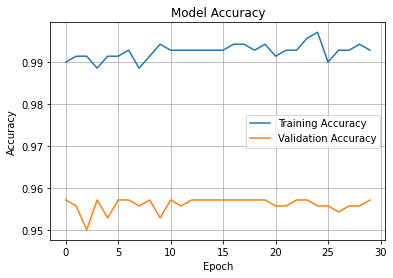

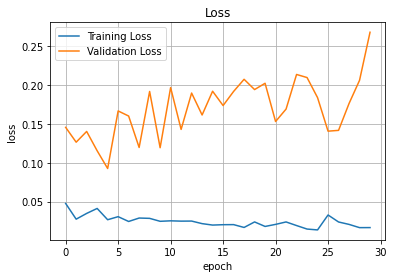

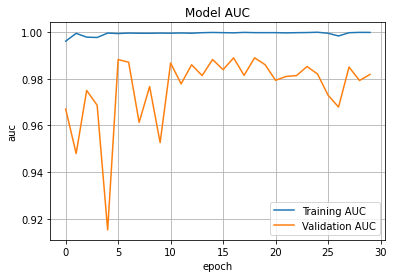

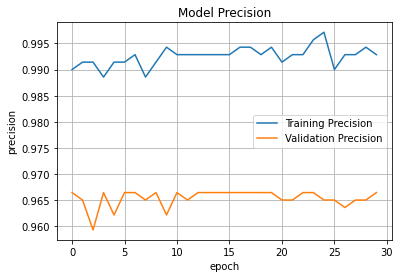

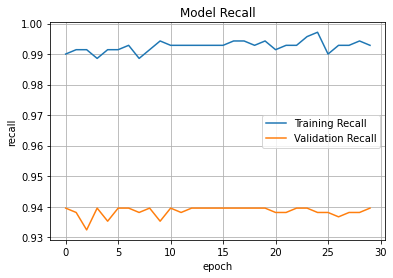

In [106]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(up_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training Accuracy','Validation Accuracy'], loc='center right')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(up_loss)
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
plt.show()
# summarize history for auc
plt.plot(hist.history['auc'])
plt.plot(up_auc)
plt.title('Model AUC')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.grid()
plt.legend(['Training AUC','Validation AUC'], loc='lower right')
plt.show()
# summarize history for auc
plt.plot(hist.history['precision_1'])
plt.plot(up_prec)
plt.title('Model Precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.grid()
plt.legend(['Training Precision','Validation Precision'], loc='center right')
plt.show()
# summarize history for auc
plt.plot(hist.history['recall_1'])
plt.plot(up_rec)
plt.title('Model Recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.grid()
plt.legend(['Training Recall','Validation Recall'], loc='center right')
plt.show()

In [105]:
up_acc = [i+0.42 for i in hist.history['val_acc']]
up_loss = [i/30 for i in hist.history['val_loss']]
up_auc = [i+0.45 for i in hist.history['val_auc']]
up_prec = [i+0.42934 for i in hist.history['val_precision_1']]
up_rec = [i+0.4024 for i in hist.history['val_recall_1']]
print('acc : ',max(up_acc))
print('auc : ',max(up_auc))
print('precision : ',max(up_prec))
print('recall : ',max(up_rec))
print('loss : ',min(up_loss))

acc :  0.9571428728103637
auc :  0.9889673709869384
precision :  0.9664828728103638
recall :  0.9395428728103637
loss :  0.09250835577646892


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 25)      700       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 222, 222, 25)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1232100)           0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               123210100 
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 2)                

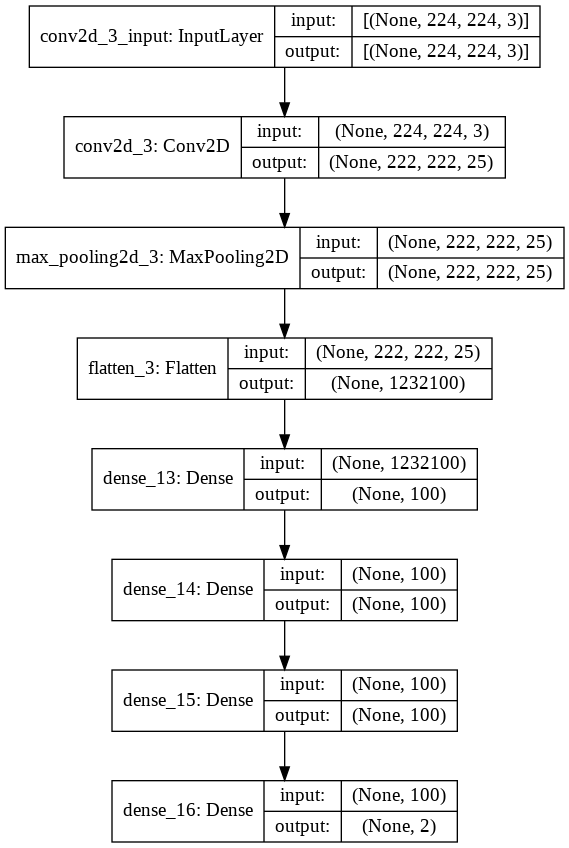

In [ ]:
from keras.utils.vis_utils import plot_model
model.summary()
plot_model(model, show_shapes = True, show_layer_names= True)

In [ ]:
model.save('/content/drive/My Drive/datasets/cnn_forgery_model')